In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
# create database connections
conn = sqlite3.connect('inventory.db')

# fatching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,Totalpurchasequantity,Totalpurchasedollars,Totalsalesquantity,Totalsalesdollars,Totalprice,Totalexcisetax,Freight_Cost,Grossprofit,ProfitMargin,StockTurnover,salestopurchaseratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [4]:
# summary statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
Totalpurchasequantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
Totalpurchasedollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
Totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
Totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
Totalprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


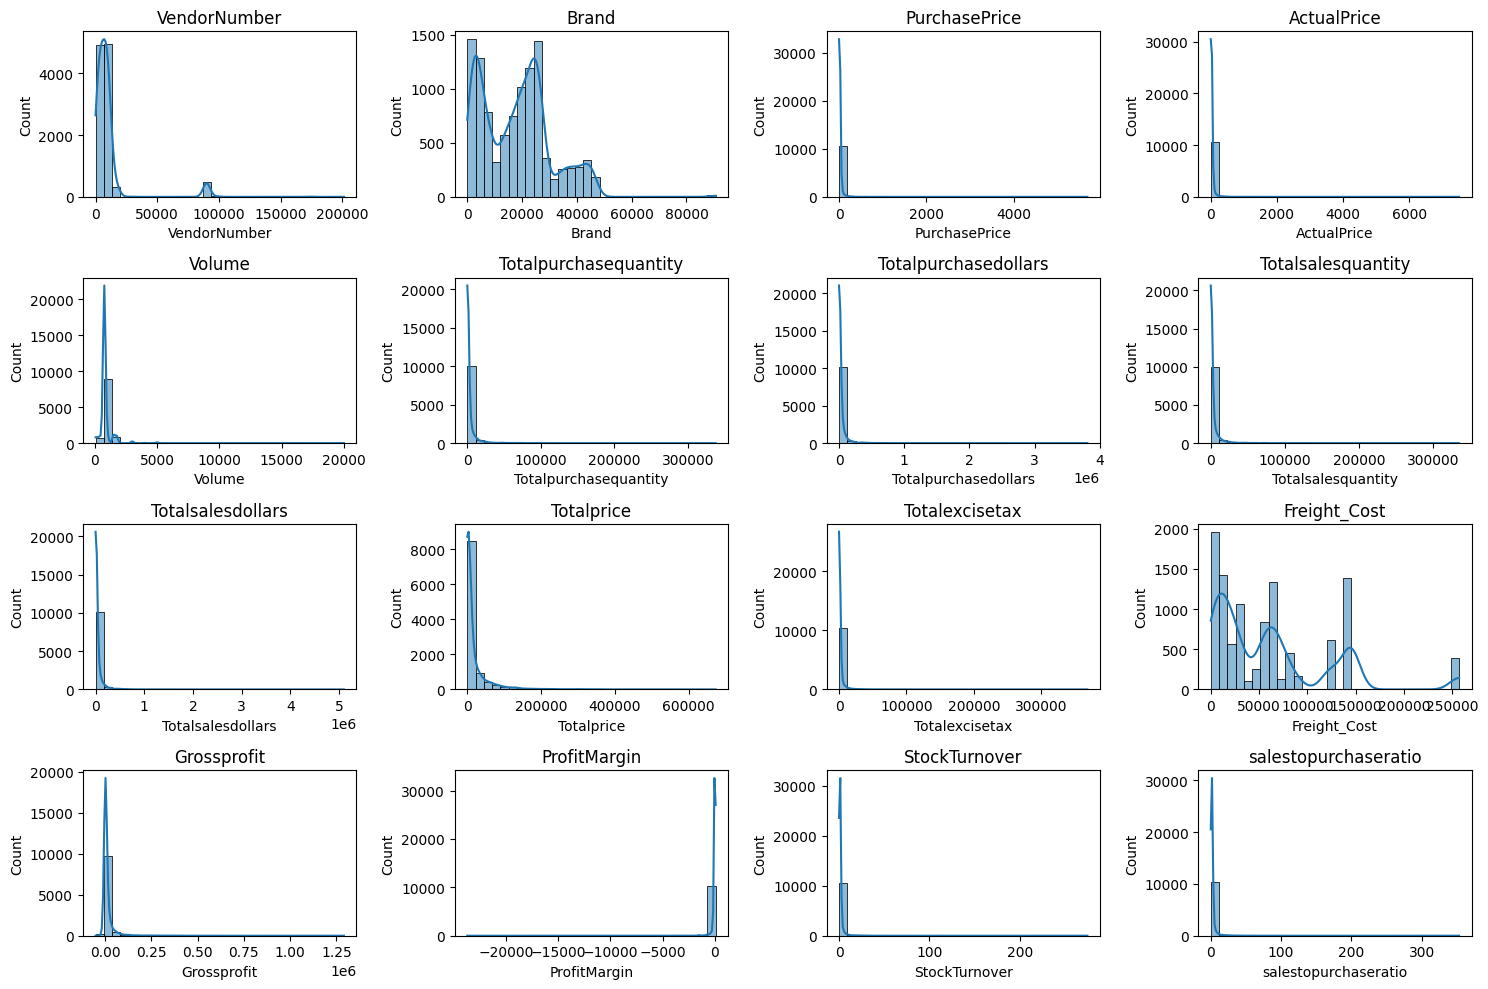

In [5]:
# Distribution plot for numaric values
numaric_col = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i ,col in enumerate(numaric_col):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.savefig("distribution plot for numaric values.png", dpi=500, bbox_inches="tight")  
plt.show()


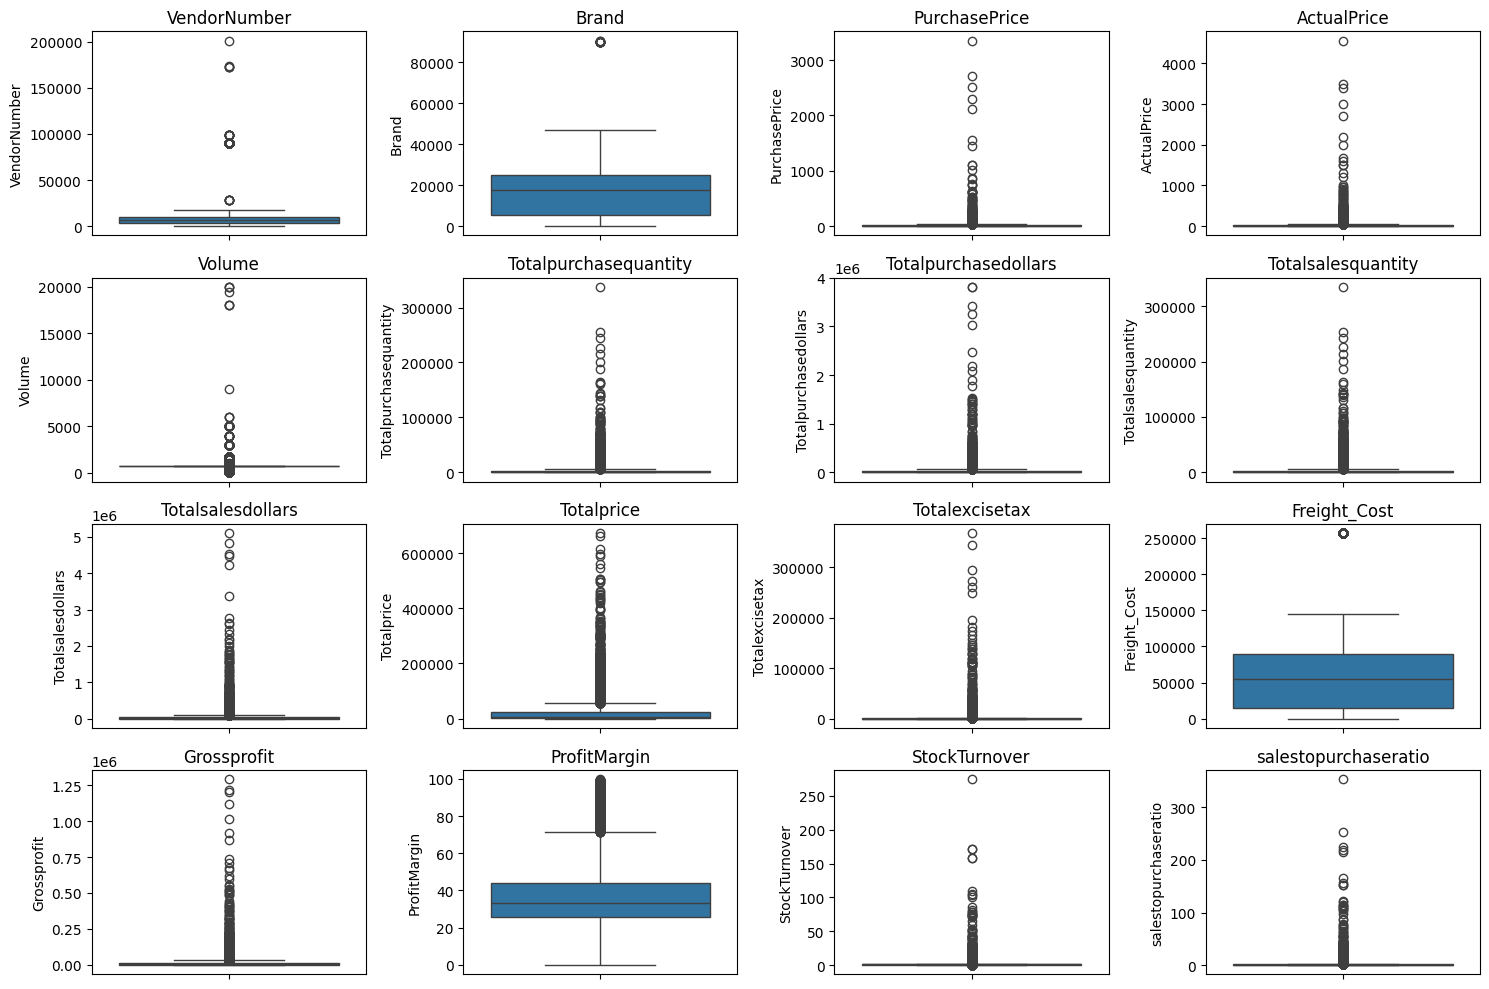

In [49]:
# outlier detection using boxplot
plt.figure(figsize=(15,10))
for i ,col in enumerate(numaric_col):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig("outlier detection using boxplot.png", dpi=500, bbox_inches="tight") 
plt.show()

# Summary Statistics Insights:

## Negative & Zero Values:
- bross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
- Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

## Outliers Indicated by High Standard Deviations:
- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 -   indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [7]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'Totalpurchasequantity',
       'Totalpurchasedollars', 'Totalsalesquantity', 'Totalsalesdollars',
       'Totalprice', 'Totalexcisetax', 'Freight_Cost', 'Grossprofit',
       'ProfitMargin', 'StockTurnover', 'salestopurchaseratio'],
      dtype='object')

In [8]:
# lets filter the data by removing inconsistencies
df = pd.read_sql_query("""select * from vendor_sales_summary where 
    Grossprofit > 0
and  ProfitMargin > 0
and Totalsalesquantity > 0""",conn)

In [9]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,Totalpurchasequantity,Totalpurchasedollars,Totalsalesquantity,Totalsalesdollars,Totalprice,Totalexcisetax,Freight_Cost,Grossprofit,ProfitMargin,StockTurnover,salestopurchaseratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


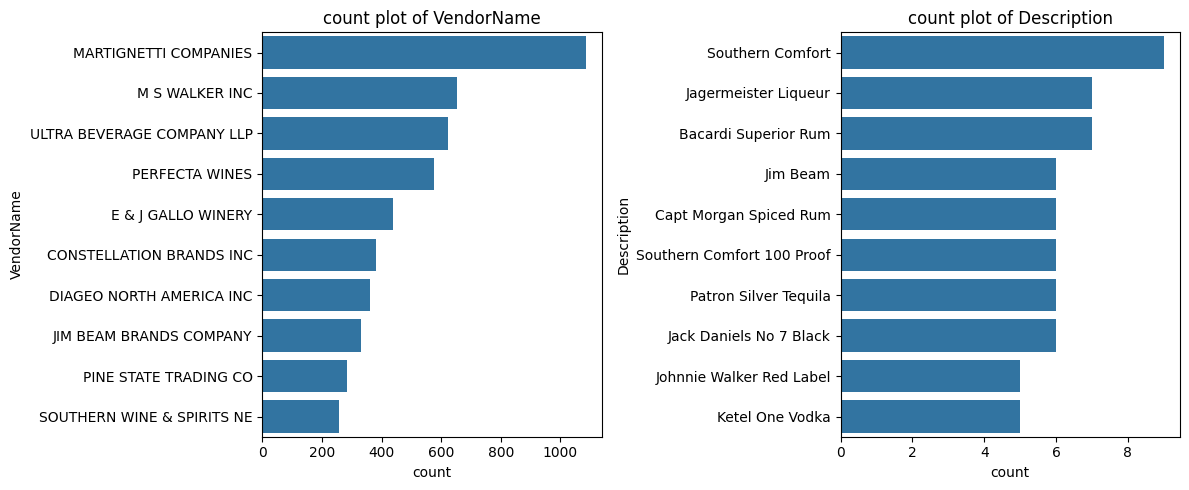

In [50]:
# count plot for categorical columns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12,5))
for i ,col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.savefig("count plot for cateforical columns.png", dpi=500, bbox_inches="tight") 
plt.show()

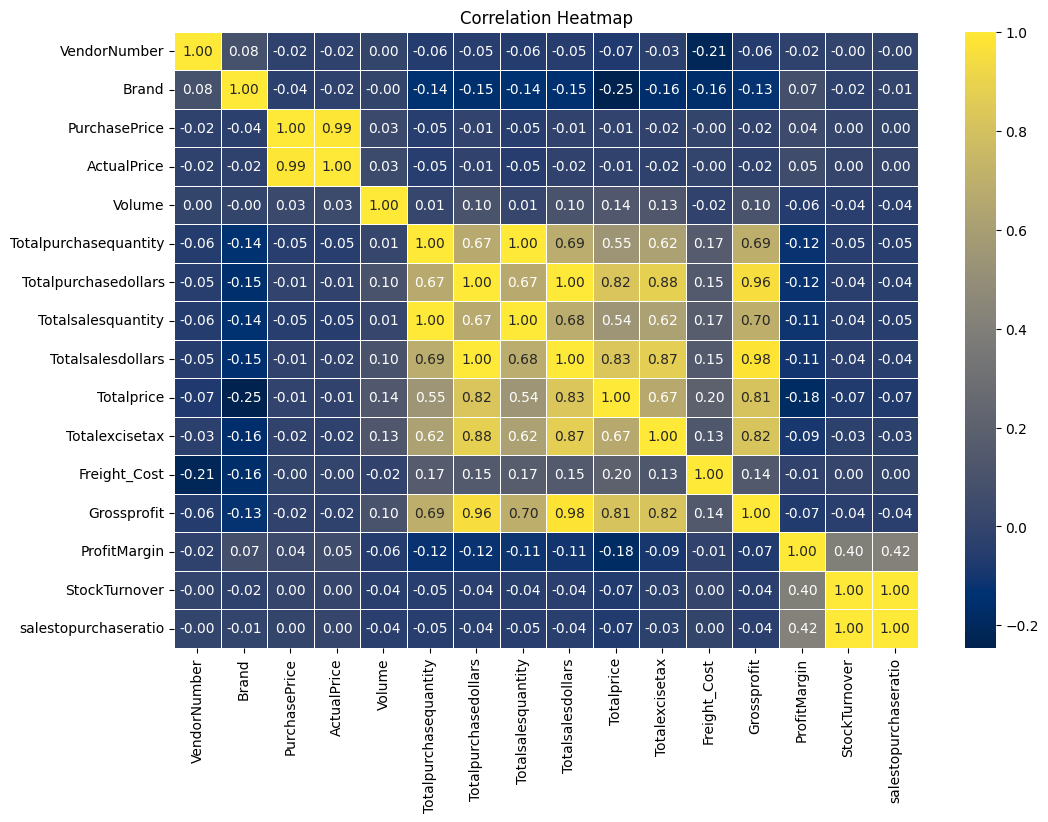

In [51]:
# correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numaric_col].corr()
sns.heatmap(correlation_matrix, annot=True, fmt="0.2f",cmap="cividis",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig("correlation heatmap.png", dpi=500, bbox_inches="tight") 
plt.show()

# Correlation Insights
- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- Stock Turnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis

##### Identify Brands that need promotional or pricing adjustments which exhibit lower sales performance but higher profit margins.

In [12]:
brand_performance = df.groupby("Description").agg({
    'Totalsalesdollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [13]:
brand_performance

,Description,Totalsalesdollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [14]:
low_sales_threshold = brand_performance['Totalsalesdollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold

np.float64(560.299)

In [16]:
high_margin_threshold

np.float64(64.97017552750111)

In [17]:
# filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['Totalsalesdollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("brands with low sales but high profit margins:")
display(target_brands.sort_values('Totalsalesdollars'))

brands with low sales but high profit margins:


,Description,Totalsalesdollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [18]:
brand_performance = brand_performance[brand_performance['Totalsalesdollars']<10000] # for better visualization

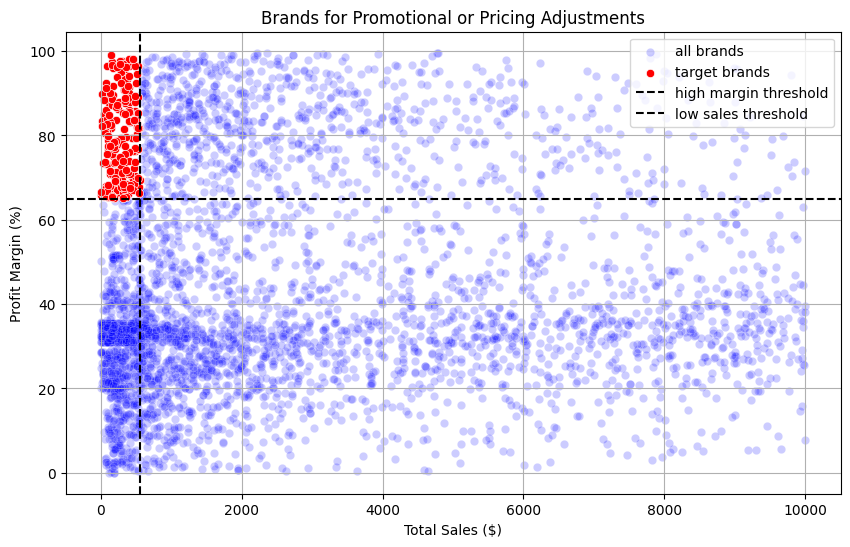

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='Totalsalesdollars', y='ProfitMargin', color='blue', label='all brands', alpha = 0.2)
sns.scatterplot(data=target_brands, x='Totalsalesdollars', y='ProfitMargin', color='red', label='target brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='high margin threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='low sales threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.savefig("filter brands with low sales but high profit margins.png", dpi=500, bbox_inches="tight") 
plt.show()

### Which vendor and brands demostrend highest sales performance?

In [56]:
def format_dollars(value):
     if value >= 100000:
         return f"{value / 1000000:.2f}M"
     elif value >= 1000:
         return f"{value / 1000:.2f}K"
     else:
         return str(value)

In [57]:
# top 10 vendor and brands 
top_vendor = df.groupby("VendorName")["Totalsalesdollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["Totalsalesdollars"].sum().nlargest(10)
top_vendor

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: Totalsalesdollars, dtype: float64

In [58]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: Totalsalesdollars, dtype: object

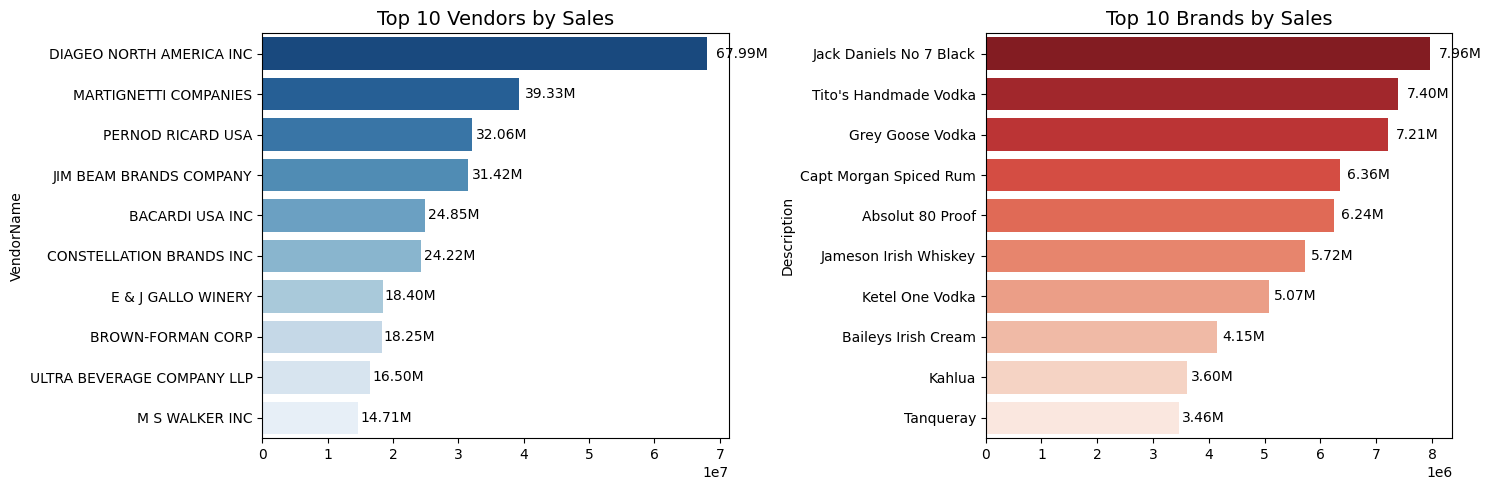

In [60]:
plt.figure(figsize=(15, 5))

# --- Top Vendors ---
plt.subplot(1, 2, 1)

# Ensure top_vendor is sorted (descending by sales)
top_vendor = top_vendor.sort_values(ascending=False)

ax1 = sns.barplot(
    y=top_vendor.index, 
    x=top_vendor.values, 
    palette="Blues_r", 
    order=top_vendor.index  # order ensures correct sorting
)

plt.title("Top 10 Vendors by Sales", fontsize=14)

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# --- Top Brands ---
plt.subplot(1, 2, 2)

top_brands = top_brands.sort_values(ascending=False)

ax2 = sns.barplot(
    y=top_brands.index.astype(str), 
    x=top_brands.values, 
    palette="Reds_r", 
    order=top_brands.index.astype(str)  # keep correct order
)

plt.title("Top 10 Brands by Sales", fontsize=14)

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.savefig("top 10 vendors and brands by sales.png", dpi=300, bbox_inches="tight") 
plt.show()


## Which vendor contribute the most to total purchase dollars?

In [24]:
vendor_performance = df.groupby('VendorName').agg({
    'Totalpurchasedollars':'sum',
    'Grossprofit':'sum',
    'Totalsalesdollars':'sum'
}).reset_index()

In [25]:
vendor_performance["Purchasecontribution%"] = vendor_performance["Totalpurchasedollars"] / vendor_performance["Totalpurchasedollars"].sum()*100

In [26]:
vendor_performance = round(vendor_performance.sort_values('Purchasecontribution%', ascending = False),2)

In [27]:
# display top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['Totalsalesdollars'] = top_vendors['Totalsalesdollars'].apply(format_dollars)
top_vendors['Totalpurchasedollars'] = top_vendors['Totalpurchasedollars'].apply(format_dollars)
top_vendors['Grossprofit'] = top_vendors['Grossprofit'].apply(format_dollars)
top_vendors

,VendorName,Totalpurchasedollars,Grossprofit,Totalsalesdollars,Purchasecontribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [28]:
top_vendors['Cumulative_contribution%'] = top_vendors['Purchasecontribution%'].cumsum()
top_vendors

,VendorName,Totalpurchasedollars,Grossprofit,Totalsalesdollars,Purchasecontribution%,Cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


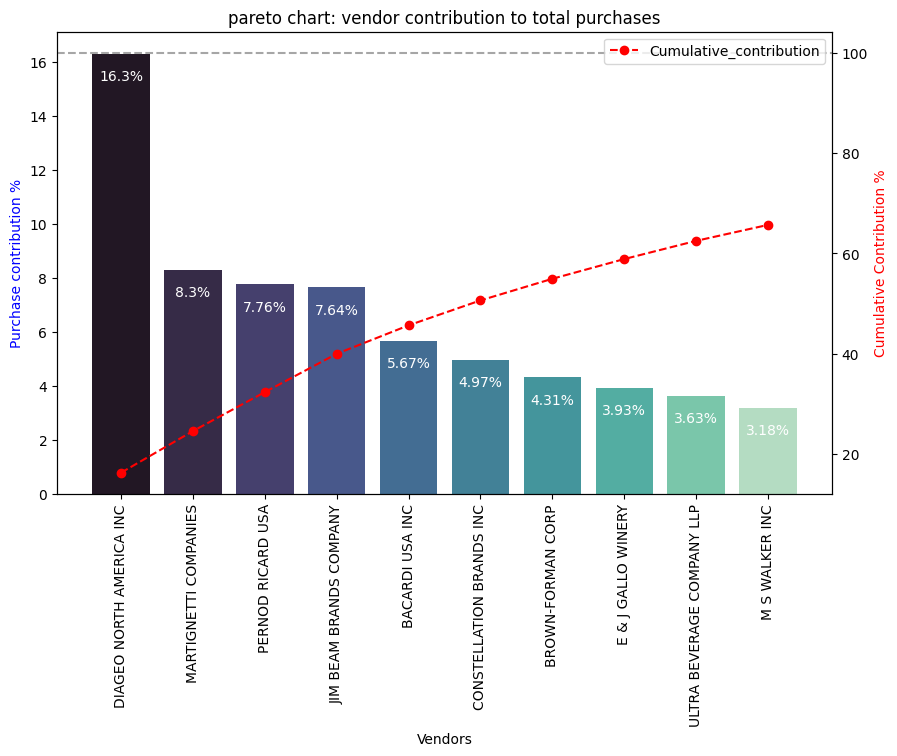

In [61]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# bar plot for purchase contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchasecontribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchasecontribution%']):
    ax1.text(i, value -1, str(value)+'%', ha='center', fontsize=10, color='white')

# line plot for cumulative contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_contribution%'], color='red',marker='o',linestyle='dashed',label='Cumulative_contribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('pareto chart: vendor contribution to total purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')
plt.savefig("vendor contribute the most to total purchase dollars.png", dpi=500, bbox_inches="tight") 
plt.show()

## How much of total procurement is dependent on the top vendors?

In [30]:
print(f"total purchase contribution of top 10 vendors is {round(top_vendors['Purchasecontribution%'].sum(),2)} %")

total purchase contribution of top 10 vendors is 65.69 %


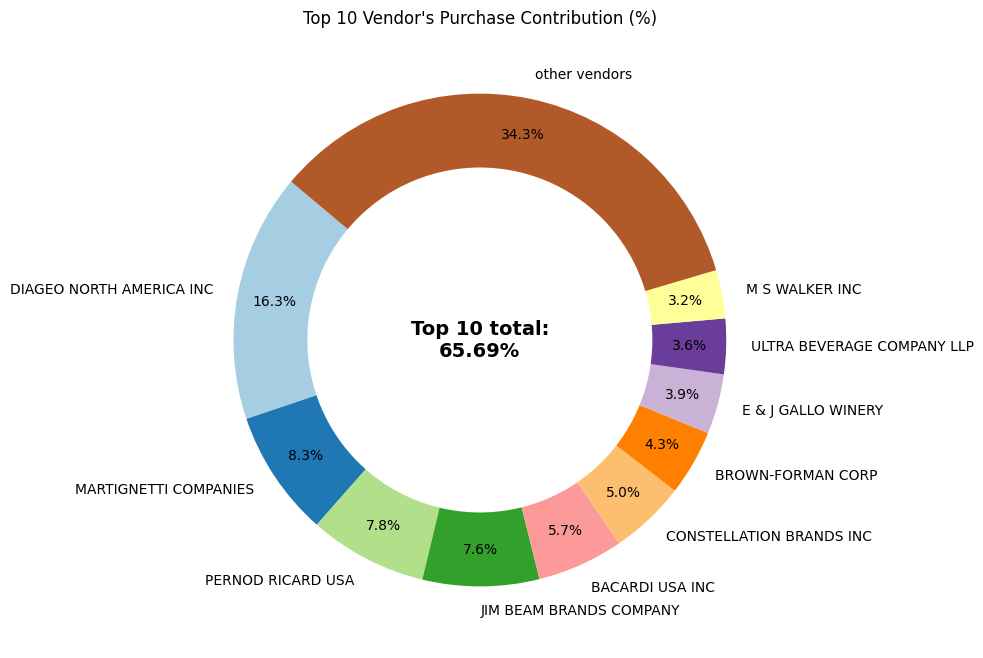

In [62]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchasecontribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# append 'other vendors' category
vendors.append('other vendors')
purchase_contributions.append(remaining_contribution)

# donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# generate colors dynamically
cmap = plt.cm.Paired
colors = cmap(np.linspace(0, 1, len(vendors)))

wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=colors
)

# draw a white circle in the center to create a 'donut' effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# add total contribution annotation in the center
plt.text(0, 0, f"Top 10 total:\n{total_contribution:.2f}%", 
         fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.savefig("total procurement is dependent on the top vendors.png", dpi=500, bbox_inches="tight") 
plt.show()

## Dose purchasing in bulik reduce the unit price, and what is the optimal purchase volume for cost savings?

In [32]:
df['Unitpurchaseprice'] = df['Totalpurchasedollars'] / df['Totalpurchasequantity']

In [33]:
df['Ordersize'] = pd.qcut(df['Totalpurchasequantity'], q=3, labels=['Small','Medium','Large'])

In [34]:
df[['Ordersize','Totalpurchasequantity']]

,Ordersize,Totalpurchasequantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8560,Small,2
8561,Small,6
8562,Small,2
8563,Small,1


In [35]:
df.groupby('Ordersize')[['Unitpurchaseprice']].mean()

,Unitpurchaseprice
Ordersize,
Small,39.057543
Medium,15.486414
Large,10.777625


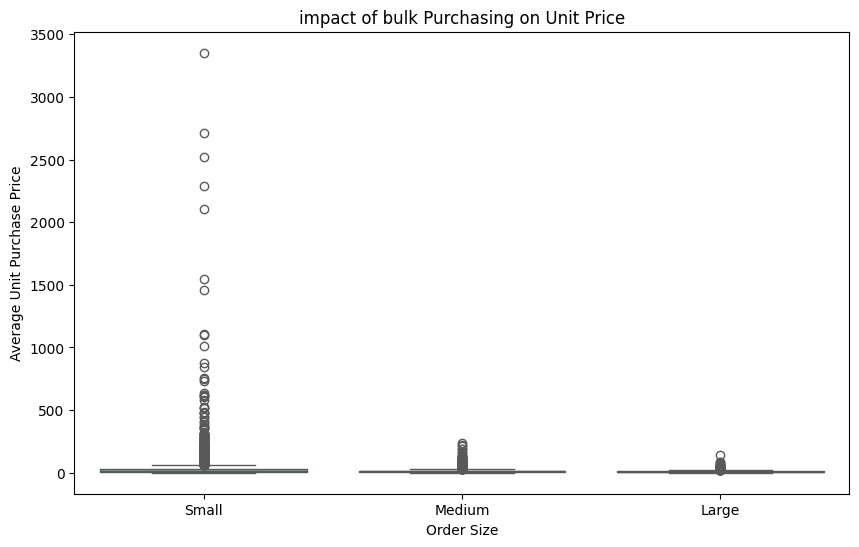

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ordersize', y='Unitpurchaseprice', palette='Set2')
plt.title('impact of bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

## Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [37]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'Totalpurchasequantity',
       'Totalpurchasedollars', 'Totalsalesquantity', 'Totalsalesdollars',
       'Totalprice', 'Totalexcisetax', 'Freight_Cost', 'Grossprofit',
       'ProfitMargin', 'StockTurnover', 'salestopurchaseratio',
       'Unitpurchaseprice', 'Ordersize'],
      dtype='object')

In [38]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


## How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [64]:
df["Unsoldinventoryvalue"]=(df["Totalpurchasequantity"] - df["Totalsalesquantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df['Unsoldinventoryvalue'].sum()))

Total Unsold Capital: 2.71M


In [65]:
# aggregate capital locked per vendor
inventory_value_per_vendor = df.groupby('VendorName')['Unsoldinventoryvalue'].sum().reset_index()

# sort vendors with the highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='Unsoldinventoryvalue', ascending=False)
inventory_value_per_vendor['Unsoldinventoryvalue'] = inventory_value_per_vendor['Unsoldinventoryvalue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,Unsoldinventoryvalue
25,DIAGEO NORTH AMERICA INC,0.72M
46,JIM BEAM BRANDS COMPANY,0.55M
68,PERNOD RICARD USA,0.47M
116,WILLIAM GRANT & SONS INC,0.40M
30,E & J GALLO WINERY,0.23M
79,SAZERAC CO INC,0.20M
11,BROWN-FORMAN CORP,0.18M
20,CONSTELLATION BRANDS INC,0.13M
61,MOET HENNESSY USA INC,0.13M
77,REMY COINTREAU USA INC,0.12M


## What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [66]:
top_threshold = df['Totalsalesdollars'].quantile(0.75)
low_threshold = df['Totalsalesdollars'].quantile(0.25)

In [67]:
top_vendor = df[df['Totalsalesdollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendor = df[df['Totalsalesdollars'] <= low_threshold]['ProfitMargin'].dropna()

In [68]:
low_vendor

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8560    83.448276
8561    96.436186
8562    25.252525
8563    98.974037
8564    99.166079
Name: ProfitMargin, Length: 2142, dtype: float64

In [69]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61, Mean: 31.17)
low Vendors 95% CI: (40.48, 42.62, Mean: 41.55)


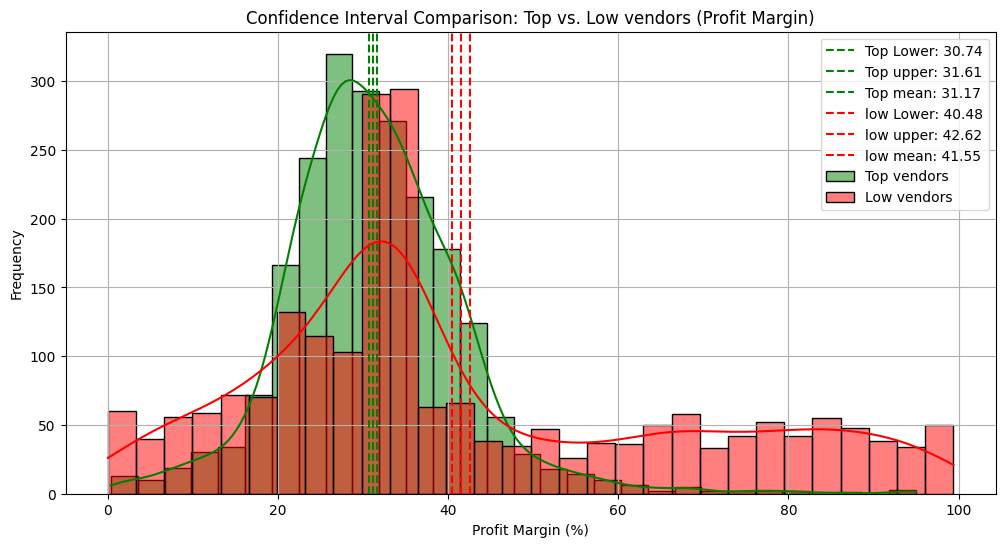

In [70]:
top_mean, top_lower, top_upper = confidence_interval(top_vendor)
low_mean, low_lower, low_upper = confidence_interval(low_vendor)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean:.2f})")
print(f"low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}, Mean: {low_mean:.2f})")

plt.figure(figsize=(12, 6))

# top vendors plot
sns.histplot(top_vendor, kde=True, color="green", bins=30, alpha=0.5, label="Top vendors")
plt.axvline(top_lower, color="green", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="green", linestyle="--", label=f"Top upper: {top_upper:.2f}")
plt.axvline(top_mean, color="green", linestyle="--", label=f"Top mean: {top_mean:.2f}")

# low vendors plot
sns.histplot(low_vendor, kde=True, color="red", bins=30, alpha=0.5, label="Low vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"low upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"low mean: {low_mean:.2f}")

# finalize plot
plt.title("Confidence Interval Comparison: Top vs. Low vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig("capital is locked in unsold inventory per vendor, and which vendors contribute the most.png", dpi=500, bbox_inches="tight")
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

In [46]:
top_threshold = df['Totalsalesdollars'].quantile(0.75)
low_threshold = df['Totalsalesdollars'].quantile(0.25)

top_vendor = df[df['Totalsalesdollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendor = df[df['Totalsalesdollars'] <= low_threshold]['ProfitMargin'].dropna()

# perform tow-sample t-test
t_stat, p_value = ttest_ind(top_vendor, low_vendor, equal_var=False)

# print results
print(f"T-Statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")

T-Statistic: -17.6440, p-value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low-performing vendors.


In [47]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,Totalpurchasequantity,Totalpurchasedollars,Totalsalesquantity,...,Totalprice,Totalexcisetax,Freight_Cost,Grossprofit,ProfitMargin,StockTurnover,salestopurchaseratio,Unitpurchaseprice,Ordersize,Unsoldinventoryvalue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large,49712.19


In [48]:
df.to_csv("vendor_sales_summary.csv", index=False)